In [1]:
using Plots, PlotThemes, LaTeXStrings
using OffsetArrays
using SparseArrays
using FFTW
using StatsBase
using Unitful
using Base: Fix1, Fix2
using Distributions

pyplot()

theme(:juno)
default(;palette=:seaborn_pastel6, background_color="#1b3041", fontfamily="serif")
j=im

im

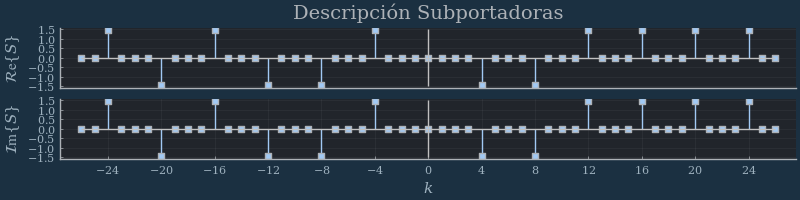

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [2]:
S = OffsetArray(sqrt(13/6).*[0, 0, 1+j, 0, 0, 0, -1-j, 0, 0, 0, 1+j, 0, 0, 0, -1-j, 0, 0, 0, -1-j, 0, 0, 0, 1+j, 0, 0, 0, 0,
0, 0, 0, -1-j, 0, 0, 0, -1-j, 0, 0, 0, 1+j, 0, 0, 0, 1+j, 0, 0, 0, 1+j, 0, 0, 0, 1+j, 0,0], -26:26)
r_s(t) = w(T_SHORT,t)*sum(S[k]*exp(j*k*2π*Δ_F*t) for k in eachindex(S))

shift(x) = [i in 1:26 ? x[i] : (i in 38:63 ? x[i-64] : 0.0+im*0.0) for i in 0:63]

function shift(x, ifft_points)
    x_shift = vcat(x[0:26], zeros(ifft_points-53), x[-26:-1])
    return x_shift
end

function make_preamble(sym) 
    sym2 = sym[length(sym)-Int(length(sym)/2)+1:end]
    return vcat(sym2, sym, sym)
end

function freq_to_wave(x, ifft_points)
    return shift(x, ifft_points) |> ifft |> make_preamble
end

p1 = plot(S |> real, line=:stem, marker=:square, ylabel=L"\mathcal{Re}\{S\}", xticks=[], title="Descripción Subportadoras")
p2 = plot(S |> imag, line=:stem, marker=:square, ylabel=L"\mathcal{Im}\{S\}", xticks=-24:4:24, xlabel=L"k")

plot!(p1, [0, 0], [-1.5,1.5], linecolor=:silver)
plot!(p2, [0, 0], [-1.5,1.5], linecolor=:silver)
plot!(p1, [-26,26], [0,0], linecolor=:silver)
plot!(p2, [-26,26], [0,0], linecolor=:silver)

plot(p1, p2, layout=(2,1), legend=false, size=(800,200), background_color="#1b3041")

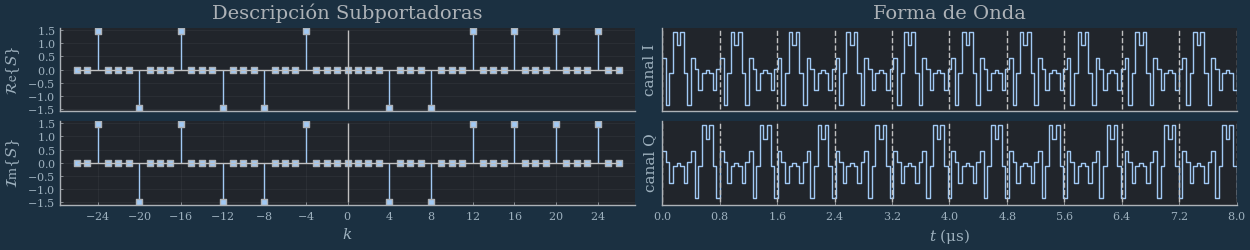

In [3]:
str_t = freq_to_wave(S, 64)

tiks = [0:0.8:8...]

t = range(0u"μs", 8u"μs", length=160)

p3 = plot(t, real(str_t), xlim=[0,8], yticks=false, line=:steppost, ylabel="canal I", xlabel="", xticks=[], title="Forma de Onda")
p4 = plot(t, imag(str_t), xlim=[0,8], yticks=false, line=:steppost, ylabel="canal Q", xticks=tiks, xlabel=L"t")

for i in tiks
    plot!(p3, [i,i], [-0.15,0.15], linestyle=:dash, linecolor=:silver)
    plot!(p4, [i,i], [-0.15,0.15], linestyle=:dash, linecolor=:silver)
end

plot(p1, p3, p2, p4, layout=(2,2), legend = false, size=1.25 .*(1000,200), background_color="#1b3041")

In [4]:
savefig("images/short.svg")

"/home/inox/Documents/IB/Proyecto Integrador/Avance 1/images/short.svg"

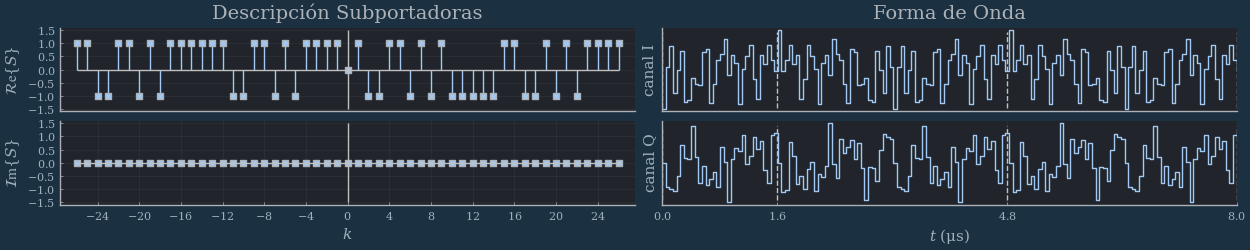

In [5]:
L = OffsetArray([1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 0, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1]
.|> Float64.|> Complex, -26:26) 

p1 = plot(L |> real, line=:stem, marker=:square, ylabel=L"\mathcal{Re}\{S\}", xticks=[], title="Descripción Subportadoras")
p2 = plot(L |> imag, line=:stem, marker=:square, ylabel=L"\mathcal{Im}\{S\}", xticks=-24:4:24, xlabel=L"k")

plot!(p1, [0, 0], [-1.5,1.5], linecolor=:silver)
plot!(p2, [0, 0], [-1.5,1.5], linecolor=:silver)
plot!(p1, [-26,26], [0,0], linecolor=:silver)
plot!(p2, [-26,26], [0,0], linecolor=:silver)


ltr_t = freq_to_wave(L, 64)

tiks = [0, 1.6,4.8,8]

t = range(0u"μs", 8u"μs", length=160)

p3 = plot(t, real(ltr_t), xlim=[0,8], yticks=false, line=:steppost, ylabel="canal I", xlabel="", xticks=[], title="Forma de Onda")
p4 = plot(t, imag(ltr_t), xlim=[0,8], yticks=false, line=:steppost, ylabel="canal Q", xticks=tiks, xlabel=L"t")

for i in tiks
    plot!(p3, [i,i], [-0.15,0.15], linestyle=:dash, linecolor=:silver)
    plot!(p4, [i,i], [-0.15,0.15], linestyle=:dash, linecolor=:silver)
end
plot(p1, p3, p2, p4, layout=(2,2), legend = false, size=1.25 .*(1000,200), background_color="#1b3041")

In [6]:
savefig("images/long.svg")

"/home/inox/Documents/IB/Proyecto Integrador/Avance 1/images/long.svg"

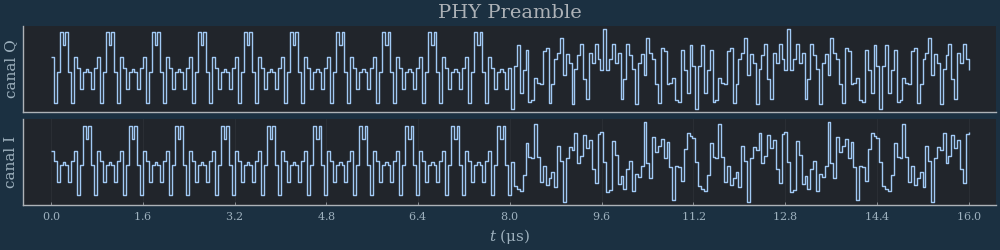

In [7]:
N = 256
sym = vcat(freq_to_wave(S, N),freq_to_wave(L, N))
sym = vcat(freq_to_wave(S, 64),freq_to_wave(L, 64))
t = range(0u"μs", 16u"μs", length=length(sym))
tiks = [0:1.6:16...]
p2 = plot(t, imag(sym), yticks=false, line=:steppost, ylabel="canal I", xlabel=L"t", xticks = tiks, title="")
p1 = plot(t, real(sym), yticks=false, line=:steppost, ylabel="canal Q", xlabel="", xticks=[], title="PHY Preamble")

plot(p1, p2, layout=(2,1), legend = false, size=(1000,250), background_color="#1b3041")

In [8]:
savefig("images/preamble.png")

"/home/inox/Documents/IB/Proyecto Integrador/Avance 1/images/preamble.png"

In [9]:
f_err = 0.0008
N = length(sym)

d = Normal(0, 0.001)
sym_ferr = sym.*exp.(im*2*pi*f_err .* (1:N)) .+ rand(d, N) .+ j.*rand(d, N)

t = range(0u"μs", 16u"μs", length=length(sym_ferr))

tiks = [0:3.2:16...]

6-element Vector{Float64}:
  0.0
  3.2
  6.4
  9.6
 12.8
 16.0

In [10]:
N = 500
start_t = 120

y = vcat(zeros(start_t), sym, zeros(N-start_t-length(sym))) .+ rand(d, N) .+ j.*rand(d, N)

t = range(0u"μs", 16u"μs"/length(sym)*length(y), length=length(y))

(0.0:0.050100200400801605:25.0) μs

In [11]:
N = 680
start_t = 140

d = Normal(0, 0.01)

y = vcat(zeros(start_t), sym, zeros(N-start_t-length(sym))) .+ rand(d, N) .+ j.*rand(d, N)
t = range(0u"μs", 16u"μs"/length(sym)*length(y), length=length(y))

(0.0:0.050073637702503684:34.0) μs

In [12]:
function delay_and_correlate(y, idx, R, L)
    x1 = y[idx:idx+R]
    x2 = y[idx+L:idx+R+L]
    return x1'*x2
end

delay_and_correlate (generic function with 1 method)

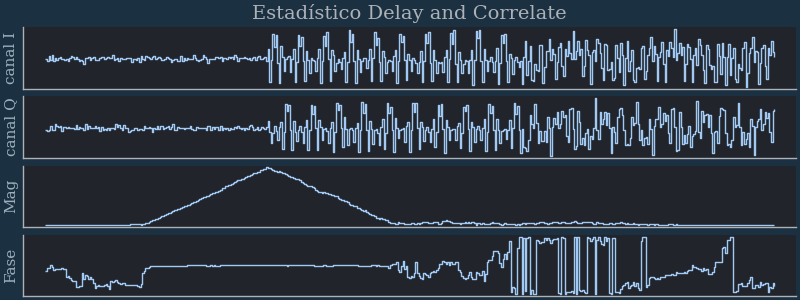

In [13]:
R=80
L=R
est2 = vcat([delay_and_correlate(y, i, R,L) for i in 1:length(y)-R-L], zeros(R+L))
lims2 = (0, maximum(abs.(est2))).*1.25

p1 = plot(real(y[1:start_t+2*length(str_t)]), yticks=false, xticks=false, line=:steppost, ylabel="canal I", xlabel="", title="Estadístico Delay and Correlate")
p2 = plot(imag(y[1:start_t+2*length(str_t)]), yticks=false, xticks=false, line=:steppost, ylabel="canal Q", xlabel="")
p3 = plot(abs.(est2[1:start_t+2*length(str_t)]), yticks=false, line=:steppost, ylabel="Mag", xlabel="", xticks=[])
p4 = plot(angle.(est2[1:start_t+2*length(str_t)]), yticks=false, xticks=false, line=:steppost, ylabel="Fase", xlabel="")

plot(p1, p2, p3, p4, layout=(4,1), legend = false, size=(800,300), background_color="#1b3041")

In [14]:
savefig("images/est2.svg")

"/home/inox/Documents/IB/Proyecto Integrador/Avance 1/images/est2.svg"

In [15]:
function short_correlate(y, idx, str_t)
    x1 = y[idx:idx+length(str_t)-1]
    return x1'*str_t
end

short_correlate (generic function with 1 method)

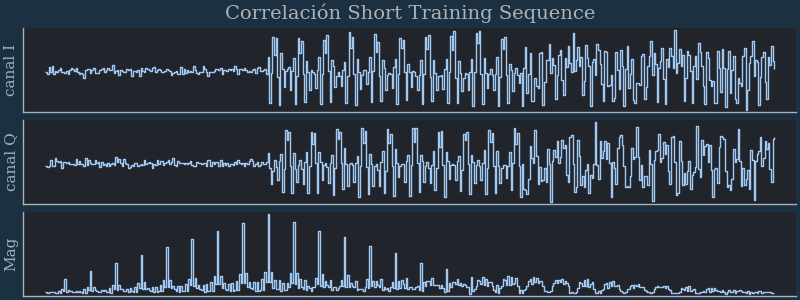

In [16]:
est1 = vcat([short_correlate(y, i, str_t) for i in 1:length(y)-length(str_t)], zeros(length(str_t)))

lims1 = (0, maximum(abs.(est1))).*1.2

p1 = plot(real(y[1:start_t+2*length(str_t)]), yticks=false, xticks=false, line=:steppost, ylabel="canal I", xlabel="", title="Correlación Short Training Sequence")
p2 = plot(imag(y[1:start_t+2*length(str_t)]), yticks=false, xticks=false, line=:steppost, ylabel="canal Q", xlabel="")
p3 = plot(abs.(est1[1:start_t+2*length(str_t)]), yticks=false, line=:steppost, ylabel="Mag", xlabel="", xticks=[])

plot(p1, p2, p3, layout=(3,1), legend = false, size=(800,300), background_color="#1b3041")

In [18]:
savefig("images/est1.svg")

"/home/inox/Documents/IB/Proyecto Integrador/Avance 1/images/est1.svg"

In [19]:
@info length(y) - length(str_t)

┌ Info: 520
└ @ Main /home/inox/Documents/IB/Proyecto Integrador/Avance 1/avance.ipynb:1


In [20]:
x_lims=(0,length(y)-length(str_t))

step = 10

#@gif for idx in 1:step:length(y)-length(str_t)
#    p1 = plot(real(y), yticks=false, line=:steppost, title="canal I", xlabel="", xticks=[], ylabel=L"y", xlims=x_lims)
#    ref = vcat(zeros(idx),str_t, zeros(length(y)-length(str_t)-idx))
#    p2 = plot(real(ref), yticks=false, line=:steppost, ylabel="r", xlabel="", xticks=[], xlims=x_lims)
#    todraw = vcat(est1[1:idx], zeros(length(y)-idx))
#    p3 = plot(abs.(todraw), yticks=false, line=:steppost, xlabel="", xticks=[], ylabel=L"|R_{y,r}|", xlims=x_lims, ylims=lims1)
#    plot!(p1, [idx, idx], [extrema(real(y))...], linestyle=:dash, linecolor=:silver)
#    plot!(p1, [idx, idx].+length(str_t), [extrema(real(y))...], linestyle=:dash, linecolor=:silver)
#    plot!(p2, [idx, idx], [extrema(real(y))...], linestyle=:dash, linecolor=:silver)
#    plot!(p2, [idx, idx].+length(str_t), [extrema(real(y))...], linestyle=:dash, linecolor=:silver)
#    plot!(p3, [idx, idx], [lims1...], linestyle=:dash, linecolor=:silver)
#    plot(p1, p2, p3, layout=(3,1), legend = false, size=(1000,120*3), background_color="#1b3041")
#end
p3 = plot(real(str_t), yticks=false, line=:steppost, xlabel="", xticks=[], linewidth=1.5,title="Referencia")
    
idx = 1
#@gif for i in 1:start_t+30
#    idx = min(start_t, i)
#    p1 = plot(real(y[idx:idx+2*length(str_t)]), yticks=false, line=:steppost, linewidth=1.5, title="Señal Recibida", xlabel="", xticks=[])
#    ref = vcat(zeros(idx),str_t, zeros(length(y)-length(str_t)-idx))
#    p2 = plot(real(y[idx:idx+length(str_t)]), yticks=false, line=:steppost, linewidth=1.5, xlabel="", xticks=[], title="Ventana")
#    plot!(p1, [1,1], [extrema(real(y))...], linewidth=2, linecolor=:silver )
#    plot!(p1, [1,1].+length(str_t), [extrema(real(y))...], linewidth=2, linecolor=:silver)
#    p23 = plot(p2, p3, layout=(1,2), legend=false)
#    plot(p1, p23, layout=(2,1), legend = false, size=(1000,300), background_color="#1b3041")
#end every 4

1

In [21]:
idx = 1

#@gif for i in 1:start_t+30
#    idx = min(start_t, i)
#    p1 = plot(real(y[idx:idx+2*length(str_t)]), yticks=false, line=:steppost, title="Señal Recibida", linewidth=1.5,xlabel="", xticks=[])
#    p2 = plot(real(y[idx:idx+R]),     ylims=extrema(real(y)), yticks=false, line=:steppost, xlabel="",linewidth=1.5, xticks=[], title="Ventana 1")
#    p3 = plot(real(y[idx+L:idx+R+L]), ylims=extrema(real(y)), yticks=false, line=:steppost, xlabel="",linewidth=1.5, xticks=[], title="Ventana 2")
#    plot!(p1, [1, 1], [extrema(real(y))...], linewidth=2, linecolor=:silver)
#    plot!(p1, [1, 1].+R, [extrema(real(y))...], linewidth=2, linestyle=:dash, linecolor=:silver)
#    plot!(p1, [1, 1].+R.+L, [extrema(real(y))...], linewidth=2, linecolor=:silver)
#    p23 = plot(p2,p3, layout=(1,2), legend=false)
#    plot(p1, p23, layout=(2,1), legend = false, size=(1000,300), background_color="#1b3041")
#end every 4

1

In [22]:
savefig("images/est2_2.svg")

"/home/inox/Documents/IB/Proyecto Integrador/Avance 1/images/est2_2.svg"

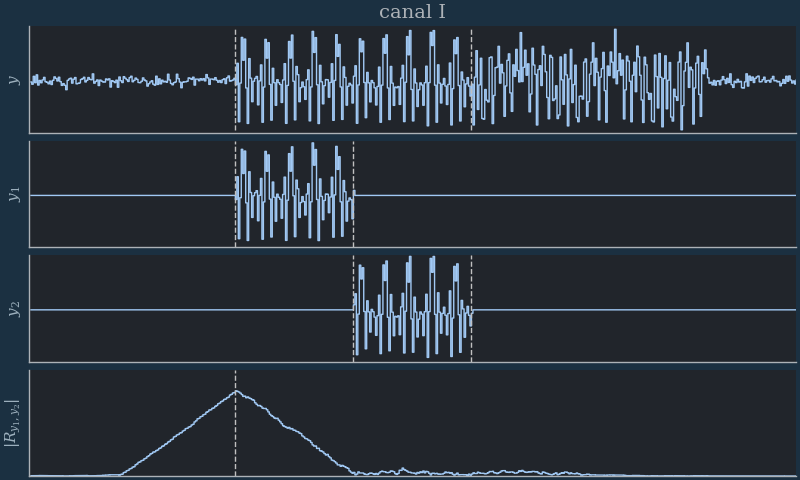

In [23]:
R=80
L=R

#@gif for idx in 1:step:length(y)-R-L
#    x_lims=(0,length(y)-R-L)
#    p1 = plot(real(y), yticks=false, line=:steppost, title="canal I", xlabel="", xticks=[], ylabel=L"y", xlims=x_lims)
#    x1 = zeros(length(y)).+im.*zeros(length(y))
#    x2 = zeros(length(y)).+im.*zeros(length(y))
#    x1[idx:idx+R]     = y[idx:idx+R]
#    x2[idx+L:idx+R+L] = y[idx+L:idx+R+L]
#    p2 = plot(real(x1), yticks=false, line=:steppost, xlabel="", xticks=[], ylabel=L"y_1", xlims=x_lims, ylims=extrema(real(y)))
#    p3 = plot(real(x2), yticks=false, line=:steppost, xlabel="", xticks=[], ylabel=L"y_2", xlims=x_lims, ylims=extrema(real(y)))
#    todraw = vcat(est2[1:idx], zeros(length(y)-R-L))
#    p4 = plot(abs.(todraw), yticks=false, line=:steppost, xlabel="", xticks=[], ylabel=L"|R_{y_1,y_2}|", xlims=x_lims, ylims=lims2)
#    plot!(p1, [idx, idx], [extrema(real(y))...], linestyle=:dash, linecolor=:silver)
#    plot!(p1, [idx, idx].+R.+L, [extrema(real(y))...], linestyle=:dash, linecolor=:silver)
#    plot!(p2, [idx, idx], [extrema(real(y))...], linestyle=:dash, linecolor=:silver)
#    plot!(p2, [idx, idx].+R, [extrema(real(y))...], linestyle=:dash, linecolor=:silver)
#    plot!(p3, [idx, idx].+L, [extrema(real(y))...], linestyle=:dash, linecolor=:silver)
#    plot!(p3, [idx, idx].+R.+L, [extrema(real(y))...], linestyle=:dash, linecolor=:silver)
#    plot!(p4, [idx, idx], [lims2...], linestyle=:dash, linecolor=:silver)
#    plot(p1, p2, p3, p4, layout=(4,1), legend = false, size=(1000,120*4), background_color="#1b3041")
#end
idx = start_t
x_lims=(0,length(y)-R-L)
p1 = plot(real(y), yticks=false, line=:steppost, title="canal I", xlabel="", xticks=[], ylabel=L"y", xlims=x_lims)
x1 = zeros(length(y)).+im.*zeros(length(y))
x2 = zeros(length(y)).+im.*zeros(length(y))
x1[idx:idx+R]     = y[idx:idx+R]
x2[idx+L:idx+R+L] = y[idx+L:idx+R+L]
p2 = plot(real(x1), yticks=false, line=:steppost, xlabel="", xticks=[], ylabel=L"y_1", xlims=x_lims, ylims=extrema(real(y)))
p3 = plot(real(x2), yticks=false, line=:steppost, xlabel="", xticks=[], ylabel=L"y_2", xlims=x_lims, ylims=extrema(real(y)))
todraw = est2
p4 = plot(abs.(todraw), yticks=false, line=:steppost, xlabel="", xticks=[], ylabel=L"|R_{y_1,y_2}|", xlims=x_lims, ylims=lims2)
plot!(p1, [idx, idx], [extrema(real(y))...], linestyle=:dash, linecolor=:silver)
plot!(p1, [idx, idx].+R.+L, [extrema(real(y))...], linestyle=:dash, linecolor=:silver)
plot!(p2, [idx, idx], [extrema(real(y))...], linestyle=:dash, linecolor=:silver)
plot!(p2, [idx, idx].+R, [extrema(real(y))...], linestyle=:dash, linecolor=:silver)
plot!(p3, [idx, idx].+L, [extrema(real(y))...], linestyle=:dash, linecolor=:silver)
plot!(p3, [idx, idx].+R.+L, [extrema(real(y))...], linestyle=:dash, linecolor=:silver)
plot!(p4, [idx, idx], [lims2...], linestyle=:dash, linecolor=:silver)
plot(p1, p2, p3, p4, layout=(4,1), legend = false, size=(800,120*4), background_color="#1b3041")

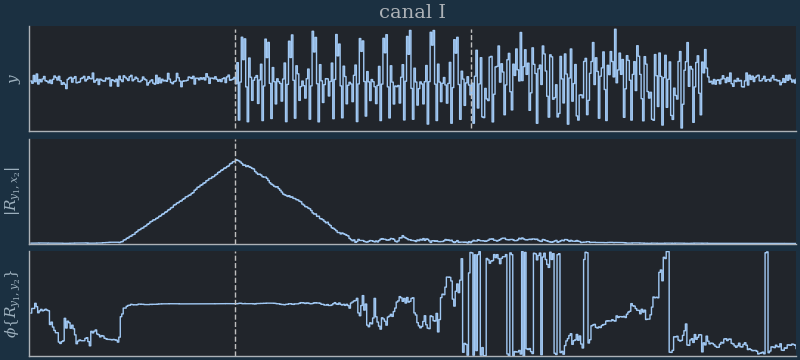

In [24]:
x_lims=(0,length(y)-R-L)
p1 = plot(real(y), yticks=false, line=:steppost, title="canal I", xlabel="", xticks=[], ylabel=L"y", xlims=x_lims)
p4 = plot(abs.(todraw), yticks=false, line=:steppost, xlabel="", xticks=[], ylabel=L"|R_{y_1,x_2}|", xlims=x_lims, ylims=lims2)
p5 = plot(angle.(todraw), yticks=false, line=:steppost, xlabel="", xticks=[], ylabel=L"\phi\{R_{y_1,y_2}\}", xlims=x_lims, ylims=[-pi,pi])
plot!(p1, [idx, idx], [extrema(real(y))...], linestyle=:dash, linecolor=:silver)
plot!(p1, [idx, idx].+R.+L, [extrema(real(y))...], linestyle=:dash, linecolor=:silver)
plot!(p4, [idx, idx], [lims2...], linestyle=:dash, linecolor=:silver)
plot!(p5, [idx, idx], [-pi,pi], linestyle=:dash, linecolor=:silver)
plot(p1, p4,p5, layout=(3,1), legend = false, size=(800,120*3), background_color="#1b3041")
